In [1]:
import pandas as pd
def get_teams():
    teams = [item.strip() for item in open("all_teams.txt",'r')]
    return teams

teams = get_teams()

Concatenate all team results

In [82]:
all_teams = pd.DataFrame()
df_list = []
dates = []
for team in teams:
    df = (pd.read_csv(f'TeamResults\\csv\\{team.strip()}_2019.csv'))
    df_list.append(df)

all_teams = pd.concat(df_list, sort=False)
all_teams

,Gm#,Date,Unnamed: 2,Tm,Unnamed: 4,Opp,W/L,R,RA,Inn,...,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
0,1,Thursday Mar 28,boxscore,LAA,@,OAK,L,0,4,NaN,...,3,2,Fiers,Cahill,NaN,2:18,D,22691,-,NaN
1,2,Friday Mar 29,boxscore,LAA,@,OAK,W,6,2,NaN,...,2,1,Robles,Soria,NaN,2:52,N,22585,+,NaN
2,3,Saturday Mar 30,boxscore,LAA,@,OAK,L,2,4,NaN,...,3,2,Anderson,Pena,Treinen,2:42,N,16051,-,NaN
3,4,Sunday Mar 31,boxscore,LAA,@,OAK,L,1,2,NaN,...,4,3,Montas,Skaggs,Treinen,2:40,D,23265,--,NaN
4,5,Monday Apr 1,boxscore,LAA,@,SEA,L,3,6,NaN,...,5,4,Hernandez,Stratton,Elias,3:20,N,14459,---,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,158,Tuesday Sep 24,boxscore,NYY,@,TBR,L-wo,1,2,12.0,...,1,up 8.0,Fairbanks,Gearrin,NaN,4:00,N,16699,-,NaN
158,159,Wednesday Sep 25,boxscore,NYY,@,TBR,L,0,4,NaN,...,1,up 7.0,Morton,Loaisiga,NaN,3:10,N,20390,--,NaN
159,160,Friday Sep 27,boxscore,NYY,@,TEX,W,14,7,NaN,...,1,up 7.0,Tarpley,Palumbo,NaN,3:37,N,35168,+,NaN
160,161,Saturday Sep 28,boxscore,NYY,@,TEX,L,4,9,NaN,...,1,up 7.0,Hernandez,Severino,NaN,3:17,N,42870,-,NaN


In [83]:
all_teams = all_teams.drop(columns=['Unnamed: 2','W/L','Inn','Rank',"GB",'Win','Loss','Save','Time','D/N','Attendance','Streak','Orig. Scheduled','W-L'])

In [84]:
all_teams

,Gm#,Date,Tm,Unnamed: 4,Opp,R,RA
0,1,Thursday Mar 28,LAA,@,OAK,0,4
1,2,Friday Mar 29,LAA,@,OAK,6,2
2,3,Saturday Mar 30,LAA,@,OAK,2,4
3,4,Sunday Mar 31,LAA,@,OAK,1,2
4,5,Monday Apr 1,LAA,@,SEA,3,6
...,...,...,...,...,...,...,...
157,158,Tuesday Sep 24,NYY,@,TBR,1,2
158,159,Wednesday Sep 25,NYY,@,TBR,0,4
159,160,Friday Sep 27,NYY,@,TEX,14,7
160,161,Saturday Sep 28,NYY,@,TEX,4,9


In [85]:
home_game = all_teams.loc[:,'Unnamed: 4'] != '@'

In [86]:
home_away = [int(item) for item in home_game.values]
all_teams.insert(1, "Home_Game",home_away, True )
all_teams = all_teams.drop(columns=['Unnamed: 4'])

In [89]:
#all_teams.to_csv("2019_all_results.csv",index=False)

In [64]:
data = all_teams.values
df = pd.DataFrame(columns=["Gm#","Date", "Home_Game", "Tm", "Opp", "RS", "RA"])
used_indices = []
for i in range(len(data)):
    if i not in used_indices:
        #find the matching index
        index = find_team_match(Team1=data[i][3],Team2=data[i][4],Date=data[i][0],DataSet=data,startindex=i+1,Team1Index=3, Team2Index=4, DateIndex=1)
        date = data[i][2].lower().replace(',','')
        
        
        if data[i][1] == 1:
            home_game = data[i][1]
            home = data[i][3]
            away = data[i][4]
            runs = data[i][5]
            runs_allowed = data[i][6]
        else:
            home_game = data[index][1]
            home = data[index][3]
            away = data[index][4]
            runs = data[index][5]
            runs_allowed = data[index][6]
        df = df.append({"Gm#":
                    "Date":date,
                   "Home_Game":home_game,
                   "Tm":home,
                   "Opp":away,
                   "RS" : runs,
                   "RA" : runs_allowed},
                 ignore_index=True)
    used_indices.append(index)

In [67]:
df.drop(columns=['Home_Game']).rename(columns={'Tm':'Home','Opp':'Away'}).to_csv("2019_Game_Scores.csv")

In [2]:
a = pd.read_csv("2019_all_games2.csv")
a

,Gm#,Tm,Home_Game,Opp,W/L,W-L,Streak,date,Team_Win_Percentage
0,1,LAA,0,OAK,L,0-1,-1,Thursday Mar 28,0.000000
1,2,LAA,0,OAK,W,1-1,1,Friday Mar 29,0.500000
2,3,LAA,0,OAK,L,1-2,-1,Saturday Mar 30,0.333333
3,4,LAA,0,OAK,L,1-3,-2,Sunday Mar 31,0.250000
4,5,LAA,0,SEA,L,1-4,-3,Monday Apr 1,0.200000
...,...,...,...,...,...,...,...,...,...
4853,158,NYY,0,TBR,L,102-56,-1,Tuesday Sep 24,0.645570
4854,159,NYY,0,TBR,L,102-57,-2,Wednesday Sep 25,0.641509
4855,160,NYY,0,TEX,W,103-57,1,Friday Sep 27,0.643750
4856,161,NYY,0,TEX,L,103-58,-1,Saturday Sep 28,0.639752


In [82]:
a['Team_Win_Percentage'] = convert_WL_Percent(a.loc[:,'W-L'].values.ravel().tolist())

In [18]:
def convert_WL_Percent(rec):
    """
    Parameter: string or list containg W-L data, separated by a hyphen
    Return: float(s) containing win percentage(s)"""
    if isinstance(rec,str):
        rec = [rec]
    elif isinstance(rec,list):
        rec = rec
    else:
        raise Exception(f"parameter given was of {type(rec)} when it should be string or list")
    
    percent = []
    for record in rec:
        record = record.split('-')
        win = float(record[0])
        loss = float(record[1])
        total = win + loss
        percent.append(win / total)
        
    if len(percent) == 1:
        return percent[0]
    else:
        return percent

Put the header back on the dataframe

In [43]:
header = a.loc[0]
a = a.loc[1:]

In [49]:
a = a.rename(columns=header)
a

,Gm#,Home_Game,Opp,Streak,Tm,W-L,W/L,Team_Win_Percentage
1,1,0,OAK,-1,LAA,0-1,L,0
2,2,0,OAK,1,LAA,1-1,W,0.5
3,3,0,OAK,-1,LAA,1-2,L,0.333333
4,4,0,OAK,-2,LAA,1-3,L,0.25
5,5,0,SEA,-3,LAA,1-4,L,0.2
...,...,...,...,...,...,...,...,...
4854,158,0,TBR,-1,NYY,102-56,L,0.64557
4855,159,0,TBR,-2,NYY,102-57,L,0.641509
4856,160,0,TEX,1,NYY,103-57,W,0.64375
4857,161,0,TEX,-1,NYY,103-58,L,0.639752


Export Dataframe to csv

In [84]:
a.to_csv('2019_all_games2.csv', index=False)

2019_all_games2.csv currently has all games, but includes duplicates.  It needs to have it sorted by home teams and opponent win-loss calculated

In [86]:
a

,Gm#,Tm,Home_Game,Opp,W/L,W-L,Streak,date,Team_Win_Percentage
0,1,LAA,0,OAK,L,0-1,-1,Thursday Mar 28,0.000000
1,2,LAA,0,OAK,W,1-1,1,Friday Mar 29,0.500000
2,3,LAA,0,OAK,L,1-2,-1,Saturday Mar 30,0.333333
3,4,LAA,0,OAK,L,1-3,-2,Sunday Mar 31,0.250000
4,5,LAA,0,SEA,L,1-4,-3,Monday Apr 1,0.200000
...,...,...,...,...,...,...,...,...,...
4853,158,NYY,0,TBR,L,102-56,-1,Tuesday Sep 24,0.645570
4854,159,NYY,0,TBR,L,102-57,-2,Wednesday Sep 25,0.641509
4855,160,NYY,0,TEX,W,103-57,1,Friday Sep 27,0.643750
4856,161,NYY,0,TEX,L,103-58,-1,Saturday Sep 28,0.639752


In [4]:
data = a.loc[0:].values

In [48]:
def find_team_match(Team1, Team2, Date, DataSet, startindex=0, Team1Index=1, Team2Index=3, DateIndex=7):
    """
    Return: Index that includes the given Parameters
    you should pass a startindex because the dataset you pass will be all games, 
    but the matching game should be in the future, so the reality is that startindex should be the index after
    the data you're starting from"""
    index = 0
    for i in range(startindex,DataSet.shape[0]):
        if Date.lower().replace(',','') == DataSet[i][DateIndex].lower().replace(',',''):
            if Team1 == DataSet[i][Team2Index] and Team2 == DataSet[i][Team1Index]:
                index = i
                break
    return index


Testing the code, the function above can find a matching game

In [43]:
i = find_team_match(Team1=data[4][1],Team2=data[4][3],Date=data[4][7],DataSet=data,startindex=1)
i

1950

In [34]:
print(data[0])
print(data[325])
print(data[326])

[1 'LAA' 0 'OAK' 'L' '0-1' -1 'Thursday Mar 28' 0.0]
[2 'OAK' 1 'SEA' 'L' '0-2' -2 'Thursday Mar 21' 0.0]
[3 'OAK' 1 'LAA' 'W' '1-2' 1 'Thursday Mar 28' 0.3333333333333333]


In [5]:
b= pd.DataFrame(columns=["Date","Home_Win","Home","Away","Home_Streak", "Away_Streak", "Home_Win_Percentage", "Away_Win_Percentage"])
b

,Date,Home_Win,Home,Away,Home_Streak,Away_Streak,Home_Win_Percentage,Away_Win_Percentage


In [6]:
#create the shortened csv
used_indices = []

for i in range(0,len(data)):
    if i not in used_indices:
        #find the matching index
        index = find_team_match(Team1=data[i][1],Team2=data[i][3],Date=data[i][7],DataSet=data,startindex=i+1)
        
        #is it a home game?
        if data[i][2] == 1:
            date = data[i][7].lower().replace(',','')
            home_win = data[i][4]
            home = data[i][1]
            away = data[index][1]
            home_streak = data[i-1][6] if data[i][0] > 1 else 0
            away_streak = data[index-1][6] if data[index][0] > 1 else 0
            home_wp = data[i-1][8] if data[i][0] > 1 else 0.
            away_wp = data[index-1][8] if data[index][0] > 1 else 0.
            b = b.append({"Date":date,
                          "Home_Win":home_win,
                          "Home":home,
                          "Away":away,
                          "Home_Streak":home_streak, 
                          "Away_Streak":away_streak, 
                          "Home_Win_Percentage":home_wp, 
                          "Away_Win_Percentage":away_wp}, 
                          ignore_index=True)
        #is it away game?    
        else:
            date = data[i][7].lower().replace(',','')
            home_win = data[index][4]
            home = data[index][1]
            away = data[i][1]
            home_streak = data[index-1][6] if data[index][0] > 1 else 0
            away_streak = data[i-1][6] if data[i][0] > 1 else 0
            home_wp = data[index-1][8] if data[index][0] > 1 else 0
            away_wp = data[i-1][8] if data[i][0] > 1 else 0.
            b = b.append({"Date":date,
                          "Home_Win":home_win,
                          "Home":home,
                          "Away":away,
                          "Home_Streak":home_streak, 
                          "Away_Streak":away_streak, 
                          "Home_Win_Percentage":home_wp, 
                          "Away_Win_Percentage":away_wp}, 
                          ignore_index=True)
            
        used_indices.append(index)



In [7]:
b

,Date,Home_Win,Home,Away,Home_Streak,Away_Streak,Home_Win_Percentage,Away_Win_Percentage
0,thursday mar 28,W,OAK,LAA,-2,0,0.000000,0.000000
1,friday mar 29,L,OAK,LAA,1,-1,0.333333,0.000000
2,saturday mar 30,W,OAK,LAA,-1,1,0.250000,0.500000
3,sunday mar 31,W,OAK,LAA,1,-1,0.400000,0.333333
4,monday apr 1,W,SEA,LAA,2,-2,0.833333,0.250000
...,...,...,...,...,...,...,...,...
2424,sunday apr 14,L,NYY,CHW,1,-1,0.428571,0.307692
2425,thursday jun 13,W,CHW,NYY,1,-1,0.484848,0.621212
2426,friday jun 14,W,CHW,NYY,2,-2,0.492537,0.611940
2427,saturday jun 15,L,CHW,NYY,3,-3,0.500000,0.602941


In [8]:
b.to_csv("2019_all.csv")

In [136]:
df_yearly_records = pd.DataFrame()
df_list = []
for year in range(2012,2020):
    df = (pd.read_csv(f'Data\\Team_Results\\{year}_Team_Records.csv'))
    df_list.append(df)

df_yearly_records = pd.concat(df_list, sort=False)
df_yearly_records

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed
0,Washington Nationals,WSN,2012,National,East,162,98,64,0,0.605,-,731,594
1,Atlanta Braves,ATL,2012,National,East,162,94,68,0,0.580,4,700,600
2,Philadelphia Phillies,PHI,2012,National,East,162,81,81,0,0.500,17,684,680
3,New York Mets,NYM,2012,National,East,162,74,88,0,0.457,24,650,709
4,Miami Marlins,MIA,2012,National,East,162,69,93,0,0.426,29,609,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Houston Astros,HOU,2019,American,West,162,107,55,0,0.660,-,920,640
26,Oakland Athletics,OAK,2019,American,West,162,97,65,0,0.599,10,845,680
27,Texas Rangers,TEX,2019,American,West,162,78,84,0,0.481,29,810,878
28,Anaheim Angels,LAA,2019,American,West,162,72,90,0,0.444,35,769,868


In [137]:
df_yearly_records.to_csv('2012-2019_team_records.csv', index=False)

In [138]:
df_yearly_records = pd.read_csv('2012-2019_team_records.csv')
df_yearly_records

,Team Name,Team Abbreviation,Year,League,Division,Games,Wins,Loses,Ties,Win_Percentage,Games_Back,Runs_Scored,Runs_Allowed
0,Washington Nationals,WSN,2012,National,East,162,98,64,0,0.605,-,731,594
1,Atlanta Braves,ATL,2012,National,East,162,94,68,0,0.580,4,700,600
2,Philadelphia Phillies,PHI,2012,National,East,162,81,81,0,0.500,17,684,680
3,New York Mets,NYM,2012,National,East,162,74,88,0,0.457,24,650,709
4,Miami Marlins,MIA,2012,National,East,162,69,93,0,0.426,29,609,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Houston Astros,HOU,2019,American,West,162,107,55,0,0.660,-,920,640
236,Oakland Athletics,OAK,2019,American,West,162,97,65,0,0.599,10,845,680
237,Texas Rangers,TEX,2019,American,West,162,78,84,0,0.481,29,810,878
238,Anaheim Angels,LAA,2019,American,West,162,72,90,0,0.444,35,769,868


In [147]:
y = df_yearly_records['Win_Percentage'].values
y_wins = df_yearly_records['Wins'].values
X_scored = df_yearly_records['Runs_Scored'].values
X_allowed = df_yearly_records['Runs_Allowed'].values
X_delta = X_scored - X_allowed

# Run Metrics as a preditor of team success
The overall runs scored and runs allowed are weaker predictors than the run differential.  You can see on the graph below that you get a much tighter band with the run delta

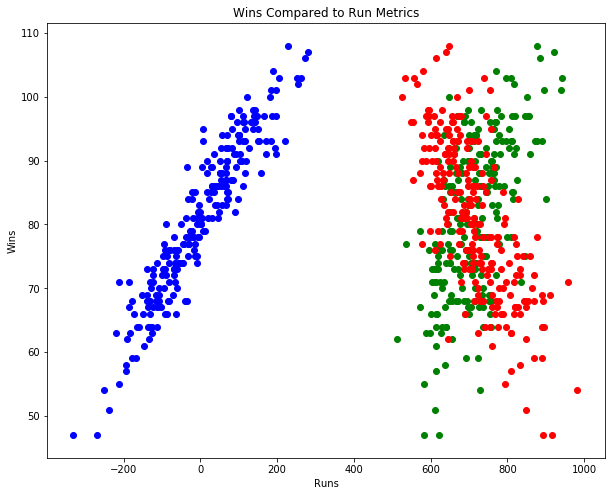

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.scatter(X_delta, y_wins, color='blue', label='run delta')
plt.scatter(X_scored,y_wins, color='green', label='runs scored')
plt.scatter(X_allowed, y_wins, color='red', label='runs allowed')
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.title('Wins Compared to Run Metrics')
plt.show()

In [154]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_delta.reshape(-1,1),y_wins)
print(f'Model Score for run Delta: {LR.score(X_delta.reshape(-1,1),y_wins)}')

Model Score for run Delta: 0.8865070684830539


In [155]:
LR = LinearRegression().fit(X_scored.reshape(-1,1),y_wins)
print(f'Model Score for runs Scored: {LR.score(X_scored.reshape(-1,1),y_wins)}')

Model Score for runs Scored: 0.3378296985104512


In [156]:
LR = LinearRegression().fit(X_allowed.reshape(-1,1),y_wins)
print(f'Score for run Delta: {LR.score(X_allowed.reshape(-1,1),y_wins)}')

Score for run Delta: 0.5321497522112286


In [76]:
all_teams = pd.read_csv("2019_all.csv")
all_results = pd.read_csv("2019_Game_Scores.csv")

In [77]:
all_teams

,Date,Home_Win,Home,Away,Home_Streak,Away_Streak,Home_Win_Percentage,Away_Win_Percentage
0,thursday mar 28,W,OAK,LAA,-2,0,0.000000,0.000000
1,friday mar 29,L,OAK,LAA,1,-1,0.333333,0.000000
2,saturday mar 30,W,OAK,LAA,-1,1,0.250000,0.500000
3,sunday mar 31,W,OAK,LAA,1,-1,0.400000,0.333333
4,monday apr 1,W,SEA,LAA,2,-2,0.833333,0.250000
...,...,...,...,...,...,...,...,...
2424,sunday apr 14,L,NYY,CHW,1,-1,0.428571,0.307692
2425,thursday jun 13,W,CHW,NYY,1,-1,0.484848,0.621212
2426,friday jun 14,W,CHW,NYY,2,-2,0.492537,0.611940
2427,saturday jun 15,L,CHW,NYY,3,-3,0.500000,0.602941


In [90]:
all_teams.sort_values([])

,Gm#,Home_Game,Date,Tm,Opp,R,RA
0,1,0,Thursday Mar 28,LAA,OAK,0,4
1,2,0,Friday Mar 29,LAA,OAK,6,2
2,3,0,Saturday Mar 30,LAA,OAK,2,4
3,4,0,Sunday Mar 31,LAA,OAK,1,2
4,5,0,Monday Apr 1,LAA,SEA,3,6
...,...,...,...,...,...,...,...
157,158,0,Tuesday Sep 24,NYY,TBR,1,2
158,159,0,Wednesday Sep 25,NYY,TBR,0,4
159,160,0,Friday Sep 27,NYY,TEX,14,7
160,161,0,Saturday Sep 28,NYY,TEX,4,9


Expand the comparitive stats

In [ ]:
#Get CSV's into memory
df = pd.read_csv("2019_all.csv")
team_runs = {}

def get_teams():
    teams = [item.strip() for item in open("all_teams.txt",'r')]
    return teams

teams = get_teams()
#make team dictionary
for team in teams:
    team_runs[team] = pd.read_csv(f"Data\\Team_Runs\\2019_{team}_runs.csv")
df

In [ ]:
new_df = pd.DataFrame()
new_df = df.loc[:,df.columns[0:4]]
new_df["Win Percent Delta"] = df.loc[:,df.columns[6]].values-df.loc[:,df.columns[7]].values
new_df["Streak Delta"] = df.loc[:,df.columns[4]].values-df.loc[:,df.columns[5]].values

In [ ]:
#create new columns for df from team run dictionary
home_RS_total = []
home_RA_total = []
home_run_delt = []
home_run_dl_p = []
home_win_totl = []
away_RS_total = []
away_RA_total = []
away_run_delt = []
away_run_dl_p = []
away_win_totl = []

for i in range(len(df)):
    home_df = team_runs[df.loc[i][2]]
    away_df = team_runs[df.loc[i][3]]
    
    #locate game stats from the df's in the team dictionaries
    home_stats = (home_df.loc[home_df.loc[:,'Date'] == df.loc[i][0]])
    away_stats = (away_df.loc[away_df.loc[:,'Date'] == df.loc[i][0]])
    
    #Extract stats from df's
    home_RS_total.append(home_stats['RS_Total'].values)  
    home_RA_total.append(home_stats['RA_Total'].values)
    home_run_delt.append(home_stats['Delta'].values)
    home_run_dl_p.append(home_stats['Delta_Percentage'].values)
    home_win_totl.append(home_stats['Wins_Total'].values)    
    away_RS_total.append(away_stats['RS_Total'].values) 
    away_RA_total.append(away_stats['RA_Total'].values)     
    away_run_delt.append(away_stats['Delta'].values)   
    away_run_dl_p.append(away_stats['Delta_Percentage'].values)
    away_win_totl.append(away_stats['Wins_Total'].values)
     


In [ ]:
RS_delta = np.ravel(home_RS_total) - np.ravel(away_RS_total)
RA_delta = np.ravel(home_RA_total) - np.ravel(away_RA_total)
RD_delta = np.ravel(home_run_delt) - np.ravel(away_run_delt)
RP_delta = np.ravel(home_run_dl_p) - np.ravel(away_run_dl_p)
WT_delta = np.ravel(home_win_totl) - np.ravel(away_win_totl)

RS_delta